### 1. 라이브러리 불러오기

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

###  2. 데이터 불러오기 및 분리

In [9]:
imageList = []
labelList = []
IMG_SIZE = 48

In [10]:
basedir = "../images/emotion_f/input/train/"

In [11]:
categories = os.listdir(basedir)
categories

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [12]:
#폴더 순환
for i in range(0, len(categories)):

    labelPath = os.path.join(basedir,categories[i])
    imagePath = os.listdir(labelPath)
    #이미지 순환
    for j in range(0,len(imagePath)):
        imageFullPath = os.path.join(labelPath, imagePath[j])
        try:
            baseimg = cv2.imread(imageFullPath,cv2.IMREAD_GRAYSCALE)
            ### 1. 이미지 사이즈 변경
            ### 2. 이미지 칼러 변경(이미 완료)
            refinedImg = cv2.resize(baseimg, (IMG_SIZE,IMG_SIZE))
            #plt.imshow(refinedImg)
            imageList.append(refinedImg)
            labelList.append(i)
        except Exception as e:
            print(e, imageFullPath)
            pass

In [15]:
imageArray = np.array(imageList)
labelArray = np.array(labelList)

In [16]:
print(imageArray.shape)
print(labelArray.shape)

(114826, 48, 48)
(114826,)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
trainingData_features,\
testData_features,\
trainingData_labels,\
testData_labels =\
train_test_split(imageArray, labelArray, test_size= 0.2, random_state=2)

In [19]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(91860, 48, 48)
(22966, 48, 48)
(91860,)
(22966,)


In [22]:
trainingData_features = trainingData_features.reshape(len(trainingData_features),IMG_SIZE,IMG_SIZE,1)
testData_features = testData_features.reshape(len(testData_features),IMG_SIZE,IMG_SIZE,1)

In [23]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(91860, 48, 48, 1)
(22966, 48, 48, 1)
(91860,)
(22966,)


In [24]:
trainingData_features_norm = trainingData_features/255.0
testData_features_norm = testData_features/255.0

In [25]:
from tensorflow.keras.utils import to_categorical
trainingData_labels_one = to_categorical(trainingData_labels)
testData_labels_one = to_categorical(testData_labels)

In [26]:
trainingData_labels_one[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 3. 모델 생성

In [27]:
inputShape = trainingData_features[0].shape
inputShape

(48, 48, 1)

In [29]:
outputShape = len(categories)
outputShape

7

### 4. 모델 컴파일

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [31]:
# 모델 생성 시작
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = inputShape
                ))

In [32]:
model.add(MaxPooling2D(pool_size=2))

In [33]:
model.add(Dropout(rate=0.4)) ##사용할 비율을 설정

In [34]:
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = inputShape
                ))

In [35]:
model.add(MaxPooling2D(pool_size=2))

In [36]:
model.add(Flatten())

In [37]:
model.add(Dense(units=outputShape,
               activation="softmax"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 3

In [39]:
from tensorflow.keras.utils import plot_model

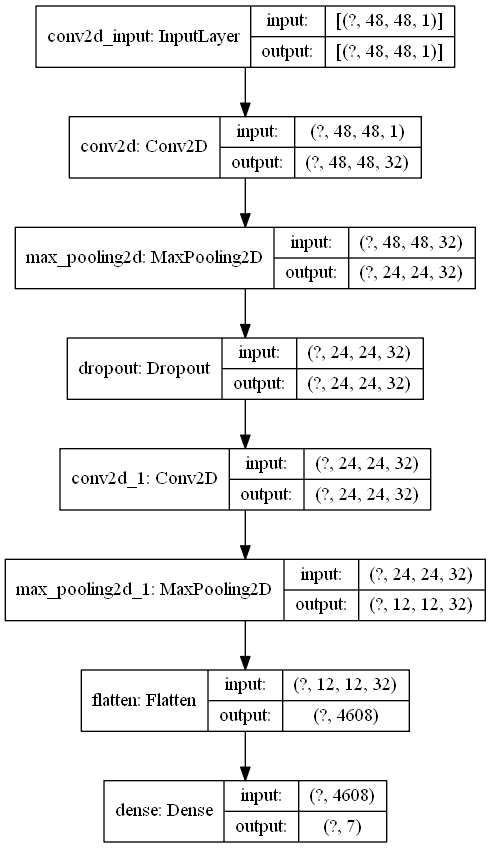

In [40]:
plot_model(model, show_shapes=True)

In [41]:
##loss, merics,optimizer
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### 5. 모델 학습

In [42]:
epochNo = 5

In [45]:
trainingData_features_norm[0].shape

(48, 48, 1)

In [46]:
model.fit(x=trainingData_features_norm,y=trainingData_labels_one, epochs=epochNo,
          batch_size = 32,
         validation_data=(testData_features_norm,testData_labels_one))

Train on 91860 samples, validate on 22966 samples
Epoch 1/5
91860/91860 [==============================] - 157s 2ms/sample - loss: 1.5155 - accuracy: 0.4150 - val_loss: 1.3293 - val_accuracy: 0.4937
Epoch 2/5
91860/91860 [==============================] - 176s 2ms/sample - loss: 1.2689 - accuracy: 0.5255 - val_loss: 1.1800 - val_accuracy: 0.5674
Epoch 3/5
91860/91860 [==============================] - 174s 2ms/sample - loss: 1.1618 - accuracy: 0.5675 - val_loss: 1.1461 - val_accuracy: 0.5818
Epoch 4/5
91860/91860 [==============================] - 167s 2ms/sample - loss: 1.0946 - accuracy: 0.5945 - val_loss: 1.0685 - val_accuracy: 0.6069
Epoch 5/5
91860/91860 [==============================] - 170s 2ms/sample - loss: 1.0468 - accuracy: 0.6121 - val_loss: 1.0220 - val_accuracy: 0.6260


### 6. 모델 추론

In [47]:
model.evaluate(x = testData_features_norm, y = testData_labels_one)

22966/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0219761762772248, 0.6259688]

### 7. 모델 저장

In [48]:
model_json = model.to_json()
with open("d:\model_emotion.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("d:\model_emotion_kopo_weight.h5")

### 8. 이미지 전처리 함수 생성

In [56]:
def refineImage(testImg):
    ## 테스트 이미지 컬러 변경
    ## 컬러이미지 -> 회색톤으로 변경
    IMG_SIZE = 48
    img_gray= cv2.cvtColor(testImg,cv2.COLOR_RGB2GRAY)

    ## 사이즈 조정
    img_resize = cv2.resize(img_gray,(IMG_SIZE,IMG_SIZE))

    ## shape 변경
    img_shape = img_resize.reshape(1,IMG_SIZE,IMG_SIZE,1)

    img_shape.shape

    ## 정규화
    img_norm = img_shape/255.0
    
    return img_norm

### 8. 모델 불러오기

In [57]:
from tensorflow.keras.models import model_from_json

In [58]:
json_file = open("d:/model_emotion.json","r")
loaded_model_json = json_file.read()
json_file.close()

In [59]:
loaded_model = model_from_json(loaded_model_json)

In [60]:
loaded_model.load_weights("d:\model_emotion_kopo_weight.h5")
# testImg = cv2.imread("d:\sample_image.PNG",cv2.IMREAD_COLOR)

In [61]:
### 9. 이미지 캡쳐(비디오 캡쳐)

In [63]:
cap = cv2.VideoCapture(0)
width = int(cap.get (cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get (cv2.CAP_PROP_FRAME_HEIGHT))
CAP_SIZE = 250
while(True):
    ret,frame = cap.read()
    if ret == False:
        break;
    
    x1 = int(width  /2 - CAP_SIZE/2)
    y1 = int(height /2 - CAP_SIZE/2)
    x2 = x1 + CAP_SIZE
    y2 = y1 + CAP_SIZE
    
#     cv2.imshow('color_frame', frame)
    key = cv2.waitKey(33)
    frame2 = cv2.rectangle(frame, (x1,y1), (x2,y2),(0,0,255),2)
    rectImage = frame2[y1:y1 + CAP_SIZE, x1:x1 + CAP_SIZE]
    outframe = refineImage(rectImage)
    predictValue = np.argmax(loaded_model.predict(outframe))
    
    cv2.putText(frame2,
               str(categories[predictValue]),
                (x1,y1-10),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0,255,255)
               )
    
    cv2.imshow('color_frame', frame2)
    
    if key==27:
        # esc key
        cap.release()
        cv2.destroyAllWindows()
    
    elif key==32:
        rectImage = frame2[y1:y1 + CAP_SIZE, x1:x1 + CAP_SIZE]
        # space bar key
        outframe = refineImage(rectImage)
        predictValue = np.argmax(loaded_model.predict(outframe))
        print(predictValue)
#         cv2.imwrite("d:/capture_frame_images.jpg", frame )
#         cv2.imwrite("d:/capture_frame2_images.jpg", frame2 )
        cv2.imwrite("d:/capture_rec_images.jpg", rectImage )
        
cap.release()
cv2.destroyAllWindows()